Theodore 

The purpose of this notebook is to analyze the data stored in the .npz file.

### Load the data 

In [1]:
## ------------------------ IMPORT LIB ------------------------ ##

import numpy as np
import matplotlib.pyplot as plt
from DataSet import DataSet
from PostProcessor import PostProcessor
from scipy.stats import linregress
import matplotlib.lines as mlines

## A) KAPPA variation

In [4]:
pp4 = PostProcessor('results/gpbo_gpytorch_UCB_cebus1_valid_KAPPA4.npz')
pp4.load_data(load_hyperparams=True)

pp5 = PostProcessor('results/gpbo_gpytorch_UCB_cebus1_valid_KAPPA5_10rep.npz')
pp5.load_data(load_hyperparams=True)

pp6 = PostProcessor('results/gpbo_gpytorch_UCB_cebus1_valid_KAPPA6_10rep.npz')
pp6.load_data(load_hyperparams=True)

pp7 = PostProcessor('results/gpbo_gpytorch_UCB_cebus1_valid_KAPPA7_10rep.npz')
pp7.load_data(load_hyperparams=True)

pp8 = PostProcessor('results/gpbo_gpytorch_UCB_cebus1_valid_KAPPA8_10rep.npz')
pp8.load_data(load_hyperparams=True)

pp10 = PostProcessor('results/gpbo_gpytorch_UCB_cebus1_valid_KAPPA10_10rep.npz')
pp10.load_data(load_hyperparams=True)

pp12 = PostProcessor('results/gpbo_gpytorch_UCB_cebus1_valid_KAPPA12_10rep.npz')
pp12.load_data(load_hyperparams=True)

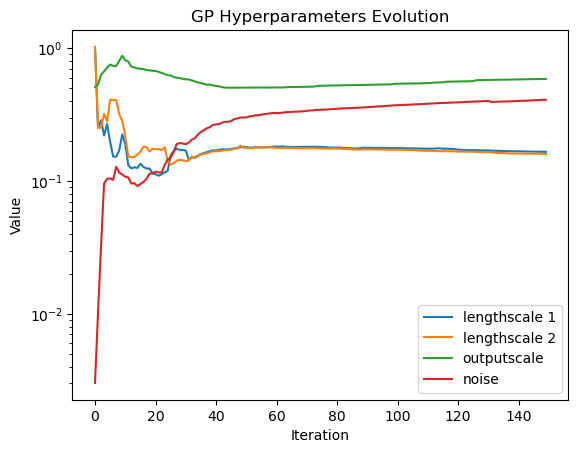

In [10]:
pp_obs = pp4
lengthscale_obs, outputscale_obs, noise_obs = pp_obs.hyperparams_metrics()
plt.figure()
plt.plot(lengthscale_obs[0], label='lengthscale 1')
plt.plot(lengthscale_obs[1], label='lengthscale 2') 
plt.plot(outputscale_obs, label='outputscale')
plt.plot(noise_obs, label='noise')
plt.legend()
plt.yscale('log')
plt.xlabel('Iteration')
plt.ylabel('Value')
plt.title('GP Hyperparameters Evolution')
plt.show()

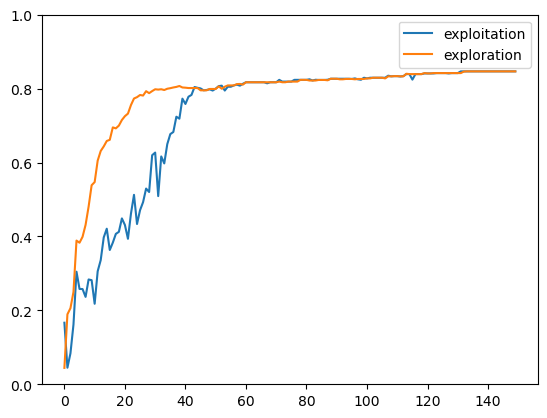

In [11]:
pp_obs = pp4
plt.plot(pp_obs.exploitation(), label='exploitation')
plt.plot(pp_obs.exploration(), label='exploration')
plt.legend()
plt.ylim(0,1)
plt.show()

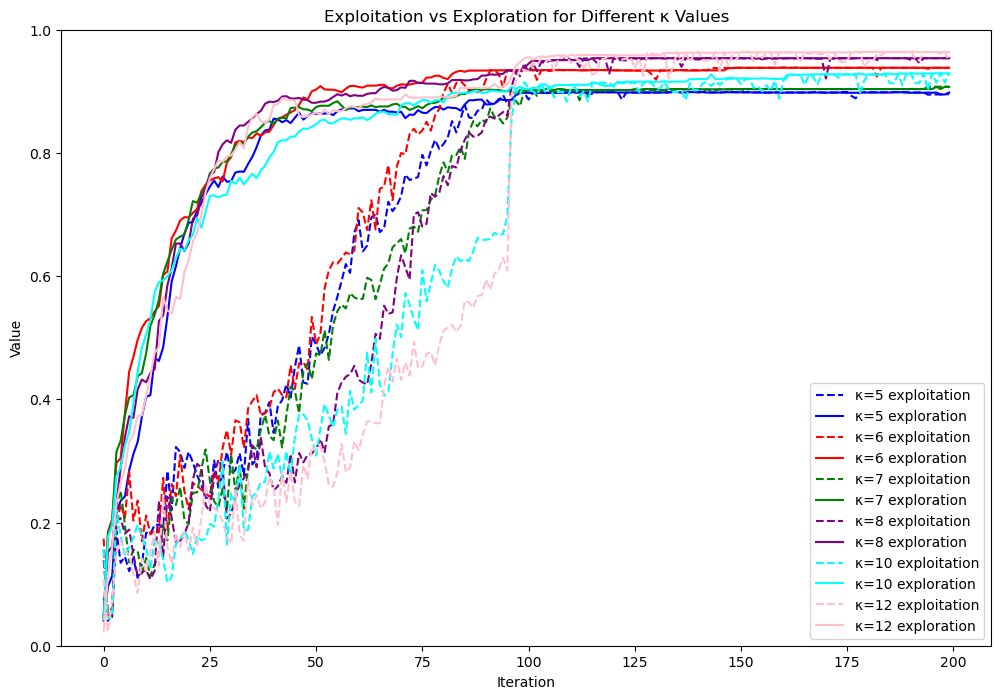

In [17]:
# Define colors for each kappa value
colors = ['blue', 'red', 'green', 'purple', 'cyan', 'pink']

# Plot exploitation (dashed) and exploration (solid) for each pp
# plt.plot(pp4.exploitation(), '--', color=colors[0], label='κ=4 exploitation')
# plt.plot(pp4.exploration(), '-', color=colors[0], label='κ=4 exploration')
plt.figure(figsize=(12,8))


plt.plot(pp5.exploitation(), '--', color=colors[0], label='κ=5 exploitation')
plt.plot(pp5.exploration(), '-', color=colors[0], label='κ=5 exploration')

plt.plot(pp6.exploitation(), '--', color=colors[1], label='κ=6 exploitation') 
plt.plot(pp6.exploration(), '-', color=colors[1], label='κ=6 exploration')

plt.plot(pp7.exploitation(), '--', color=colors[2], label='κ=7 exploitation') 
plt.plot(pp7.exploration(), '-', color=colors[2], label='κ=7 exploration')

plt.plot(pp8.exploitation(), '--', color=colors[3], label='κ=8 exploitation')
plt.plot(pp8.exploration(), '-', color=colors[3], label='κ=8 exploration')

plt.plot(pp10.exploitation(), '--', color=colors[4], label='κ=10 exploitation')
plt.plot(pp10.exploration(), '-', color=colors[4], label='κ=10 exploration')

plt.plot(pp12.exploitation(), '--', color=colors[5], label='κ=12 exploitation')
plt.plot(pp12.exploration(), '-', color=colors[5], label='κ=12 exploration')

plt.legend()
plt.ylim(0,1)
plt.xlabel('Iteration')
plt.ylabel('Value')
plt.title('Exploitation vs Exploration for Different κ Values')
plt.show()

## B) Using QueriesInfo

In [25]:
pp1 = PostProcessor('results/gpbo_gpytorch_UCB_cebus1_test1.npz')
pp1.load_data(load_hyperparams=True)

pp2 = PostProcessor('results/gpbo_estimated_gpytorch_UCB_cebus1_test_pseudo_gpy.npz')
pp2.load_data(load_hyperparams=True)

pp2bis = PostProcessor('results/gpbo_estimated_gpytorch_UCB_cebus1_test_pseudo_gpy_.npz')
pp2bis.load_data(load_hyperparams=True)

pp3 = PostProcessor('results/gpbo_estimated_hp_gpytorch_UCB_cebus1_test_pseudo_hp.npz')
pp3.load_data(load_hyperparams=True)

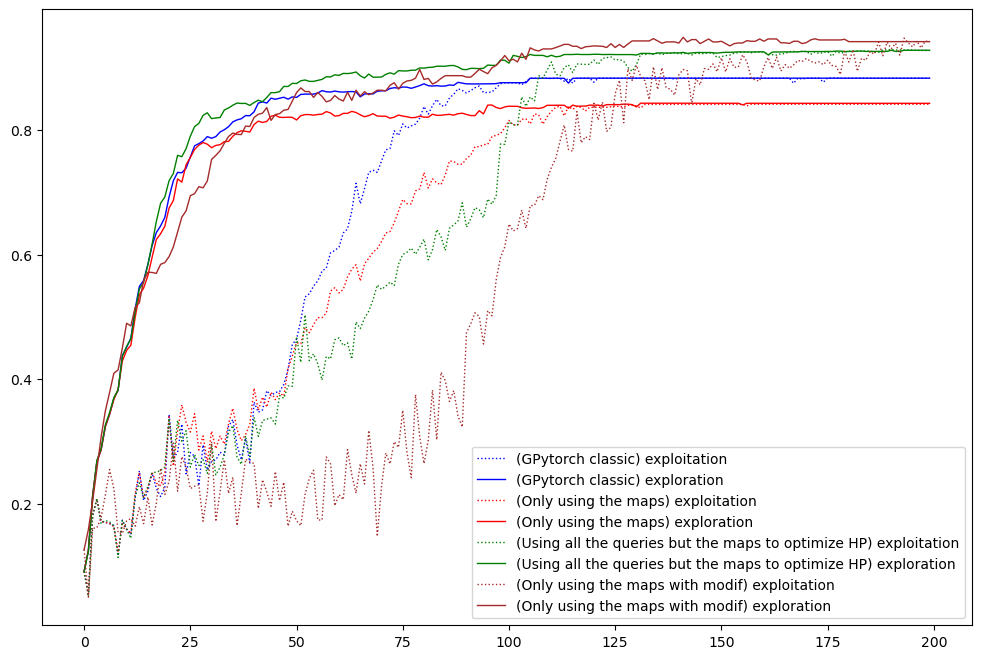

In [26]:
plt.figure(figsize=(12,8))
plt.plot(pp1.exploitation(), color='b', linewidth=1, ls=':', label='(GPytorch classic) exploitation')
plt.plot(pp1.exploration(), color='b', linewidth=1, label='(GPytorch classic) exploration')
plt.plot(pp2.exploitation(), color='r', linewidth=1, ls=':', label='(Only using the maps) exploitation')
plt.plot(pp2.exploration(), color='r', linewidth=1, label='(Only using the maps) exploration')
plt.plot(pp3.exploitation(), color='g', linewidth=1, ls=':', label='(Using all the queries but the maps to optimize HP) exploitation')
plt.plot(pp3.exploration(), color='g', linewidth=1, label='(Using all the queries but the maps to optimize HP) exploration')
plt.plot(pp2bis.exploitation(), color='brown', linewidth=1, ls=':', label='(Only using the maps with modif) exploitation')
plt.plot(pp2bis.exploration(), color='brown', linewidth=1, label='(Only using the maps with modif) exploration')
plt.legend()
plt.show()

### observe HPs

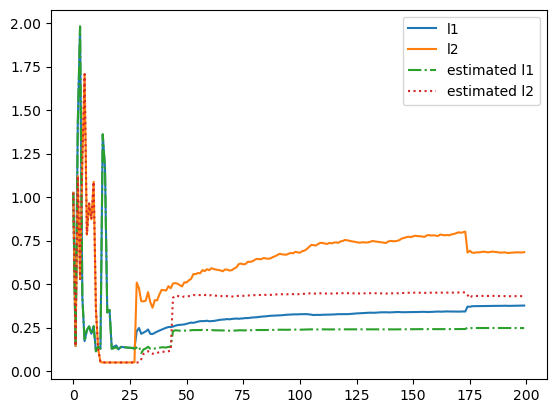

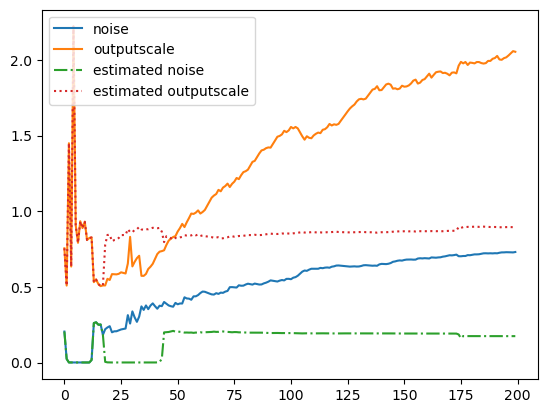

In [13]:
plt.plot(pp1.hyperparams_lengthscale[0,0,0,:], label='l1')
plt.plot(pp1.hyperparams_lengthscale[0,0,1,:], label='l2')
plt.plot(pp1.QI_hyperparams_lengthscale[0,0,0,:], label='estimated l1', ls='-.')
plt.plot(pp1.QI_hyperparams_lengthscale[0,0,1,:], label='estimated l2', ls=':')
plt.legend()
plt.show()

plt.plot(pp1.hyperparams_noise[0,0,0,:], label='noise')
plt.plot(pp1.hyperparams_outputscale[0,0,0,:], label='outputscale')
plt.plot(pp1.QI_hyperparams_noise[0,0,0,:], label='estimated noise', ls='-.')
plt.plot(pp1.QI_hyperparams_outputscale[0,0,0,:], label='estimated outputscale', ls=':')
plt.legend()
plt.show()

## C) Find best fixed (noise, outputscale)

finaly we will choose :
- noise = 0.005
- outputscale = 1

### C.1) Find the best noise for outputscale=1

In [12]:
ppf0025 = PostProcessor('results/gpbo_gpytorch_UCB_cebus1_test_outputscale1_noise0025.npz')
ppf0025.load_data(load_hyperparams=True)

ppf005 = PostProcessor('results/gpbo_gpytorch_UCB_cebus1_test_outputscale1_noise005.npz')
ppf005.load_data(load_hyperparams=True)
ppf005n = PostProcessor('results/gpbo_gpytorch_UCB_cebus1_test_outputscale1_noise005_n.npz')
ppf005n.load_data(load_hyperparams=True)

ppf0075 = PostProcessor('results/gpbo_gpytorch_UCB_cebus1_test_outputscale1_noise0075.npz')
ppf0075.load_data(load_hyperparams=True)

ppf0075n = PostProcessor('results/gpbo_gpytorch_UCB_cebus1_test_outputscale1_noise0075_n.npz')
ppf0075n.load_data(load_hyperparams=True)
ppf0075nn = PostProcessor('results/gpbo_gpytorch_UCB_cebus1_test_outputscale1_noise0075_nn.npz')
ppf0075nn.load_data(load_hyperparams=True)
ppf0075nv = PostProcessor('results/gpbo_gpytorch_UCB_cebus1_test_outputscale1_noise0075_nv.npz')
ppf0075nv.load_data(load_hyperparams=True)

ppf01 = PostProcessor('results/gpbo_gpytorch_UCB_cebus1_test_outputscale1_noise01.npz')
ppf01.load_data(load_hyperparams=True)
ppf01n = PostProcessor('results/gpbo_gpytorch_UCB_cebus1_test_outputscale1_noise01_n.npz')
ppf01n.load_data(load_hyperparams=True)

ppf02 = PostProcessor('results/gpbo_gpytorch_UCB_cebus1_test_outputscale1_noise02.npz')
ppf02.load_data(load_hyperparams=True)

ppf04 = PostProcessor('results/gpbo_gpytorch_UCB_cebus1_test_outputscale1_noise04.npz')
ppf04.load_data(load_hyperparams=True)

ppf07 = PostProcessor('results/gpbo_gpytorch_UCB_cebus1_test_outputscale1_noise07.npz')
ppf07.load_data(load_hyperparams=True)

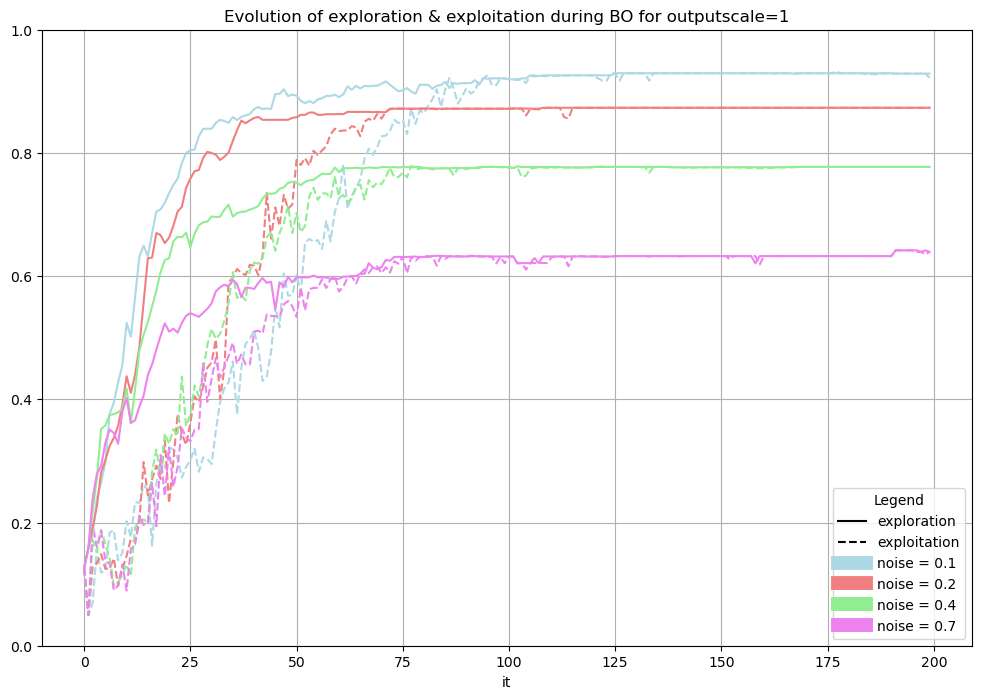

In [18]:
# Assign colors for each model
colors = {
    'sim1': 'lightblue',
    'sim2': 'lightcoral',
    'sim3': 'lightgreen',
    'sim4': 'violet',
    'sim5': 'sandybrown'
}

plt.figure(figsize=(12, 8)) 

# Plot training losses 
plt.plot(ppf01.exploitation(), color=colors['sim1'], linestyle='--')
plt.plot(ppf02.exploitation(), color=colors['sim2'], linestyle='--')
plt.plot(ppf04.exploitation(), color=colors['sim3'], linestyle='--')
plt.plot(ppf07.exploitation(), color=colors['sim4'], linestyle='--')
# plt.plot(train_losses_t7, color=colors['sim5'], linestyle='-')


# Plot validation losses 
plt.plot(ppf01.exploration(), color=colors['sim1'], linestyle='-')
plt.plot(ppf02.exploration(), color=colors['sim2'], linestyle='-')
plt.plot(ppf04.exploration(), color=colors['sim3'], linestyle='-')
plt.plot(ppf07.exploration(), color=colors['sim4'], linestyle='-')
# plt.plot(validation_losses_t7, color=colors['model7'], linestyle='-')


# Create custom legend entries
train_line = mlines.Line2D([], [], color='black', linestyle='-', label='exploration')
validation_line = mlines.Line2D([], [], color='black', linestyle='--', label='exploitation')
# test_marker = mlines.Line2D([], [], color='black', marker='x', linestyle='', label='Test')
# batchsize_line = mlines.Line2D([], [], color='black', linestyle='-', label='batchize=1024', linewidth = '3')

model1_patch = mlines.Line2D([], [], color=colors['sim1'], label='noise = 0.1', linestyle='-', linewidth = '10')
model2_patch = mlines.Line2D([], [], color=colors['sim2'], label='noise = 0.2', linestyle='-', linewidth = '10')
model3_patch = mlines.Line2D([], [], color=colors['sim3'], label='noise = 0.4', linestyle='-', linewidth = '10')
model6_patch = mlines.Line2D([], [], color=colors['sim4'], label='noise = 0.7', linestyle='-', linewidth = '10')
# model7_patch = mlines.Line2D([], [], color=colors['sim5'], label='Model 7', linestyle='-', linewidth = '10')

# Add the legend
plt.legend(handles=[train_line, validation_line, model1_patch, model2_patch, model3_patch, model6_patch],#, model7_patch],
           title='Legend')

# Add labels and title
plt.xlabel('it')
# plt.ylabel('exploration or exploitation')
# plt.yscale('log')
plt.ylim(0,1)
plt.title("Evolution of exploration & exploitation during BO for outputscale=1")
plt.grid()

# Display the plot
plt.show()

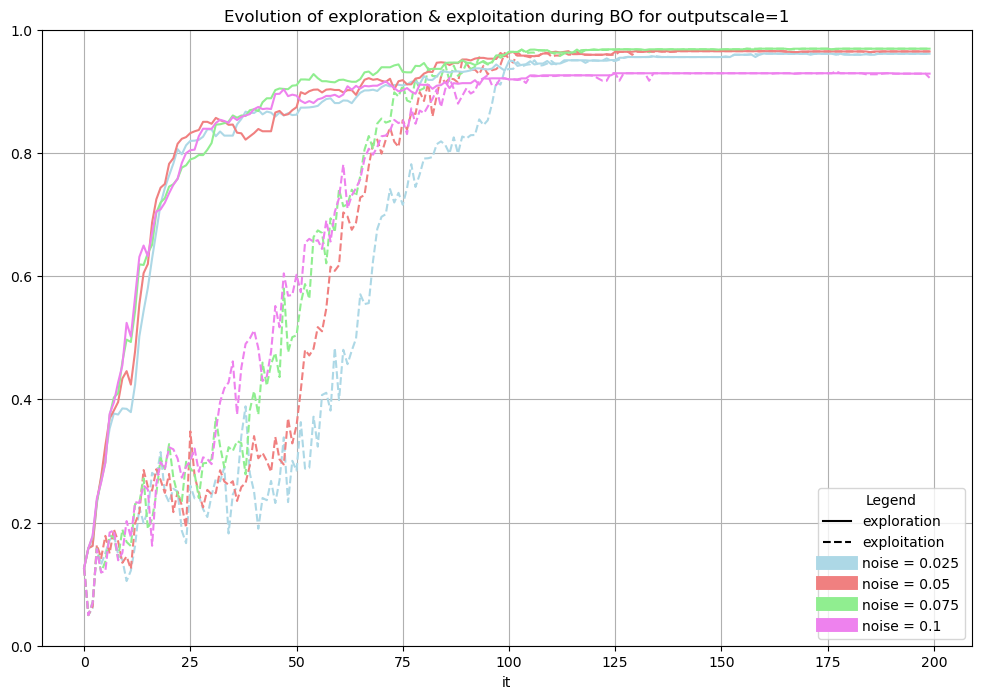

In [16]:

# Assign colors for each model
colors = {
    'sim1': 'lightblue',
    'sim2': 'lightcoral',
    'sim3': 'lightgreen',
    'sim4': 'violet',
    'sim5': 'sandybrown'
}

plt.figure(figsize=(12, 8)) 

# Plot training losses 
plt.plot(ppf0025.exploitation(), color=colors['sim1'], linestyle='--')
plt.plot(ppf005.exploitation(), color=colors['sim2'], linestyle='--')
plt.plot(ppf0075.exploitation(), color=colors['sim3'], linestyle='--')
plt.plot(ppf01.exploitation(), color=colors['sim4'], linestyle='--')
# plt.plot(train_losses_t7, color=colors['sim5'], linestyle='-')


# Plot validation losses 
plt.plot(ppf0025.exploration(), color=colors['sim1'], linestyle='-')
plt.plot(ppf005.exploration(), color=colors['sim2'], linestyle='-')
plt.plot(ppf0075.exploration(), color=colors['sim3'], linestyle='-')
plt.plot(ppf01.exploration(), color=colors['sim4'], linestyle='-')
# plt.plot(validation_losses_t7, color=colors['model7'], linestyle='-')


# Create custom legend entries
train_line = mlines.Line2D([], [], color='black', linestyle='-', label='exploration')
validation_line = mlines.Line2D([], [], color='black', linestyle='--', label='exploitation')
# test_marker = mlines.Line2D([], [], color='black', marker='x', linestyle='', label='Test')
# batchsize_line = mlines.Line2D([], [], color='black', linestyle='-', label='batchize=1024', linewidth = '3')

model1_patch = mlines.Line2D([], [], color=colors['sim1'], label='noise = 0.025', linestyle='-', linewidth = '10')
model2_patch = mlines.Line2D([], [], color=colors['sim2'], label='noise = 0.05', linestyle='-', linewidth = '10')
model3_patch = mlines.Line2D([], [], color=colors['sim3'], label='noise = 0.075', linestyle='-', linewidth = '10')
model6_patch = mlines.Line2D([], [], color=colors['sim4'], label='noise = 0.1', linestyle='-', linewidth = '10')
# model7_patch = mlines.Line2D([], [], color=colors['sim5'], label='Model 7', linestyle='-', linewidth = '10')

# Add the legend
plt.legend(handles=[train_line, validation_line, model1_patch, model2_patch, model3_patch, model6_patch],#, model7_patch],
           title='Legend')

# Add labels and title
plt.xlabel('it')
# plt.ylabel('exploration or exploitation')
# plt.yscale('log')
plt.ylim(0,1)
plt.title("Evolution of exploration & exploitation during BO for outputscale=1")
plt.grid()

# Display the plot
plt.show()

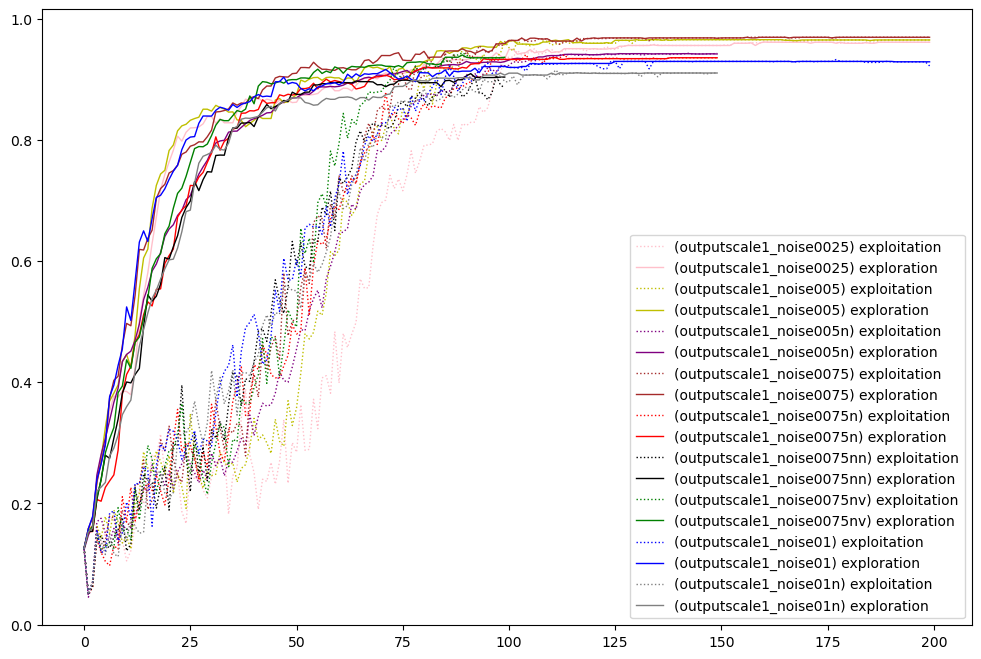

In [15]:
plt.figure(figsize=(12,8))

plt.plot(ppf0025.exploitation(), color='pink', linewidth=1, ls=':', label='(outputscale1_noise0025) exploitation')
plt.plot(ppf0025.exploration(), color='pink', linewidth=1, label='(outputscale1_noise0025) exploration')
plt.plot(ppf005.exploitation(), color='y', linewidth=1, ls=':', label='(outputscale1_noise005) exploitation')
plt.plot(ppf005.exploration(), color='y', linewidth=1, label='(outputscale1_noise005) exploration')
plt.plot(ppf005n.exploitation(), color='purple', linewidth=1, ls=':', label='(outputscale1_noise005n) exploitation')
plt.plot(ppf005n.exploration(), color='purple', linewidth=1, label='(outputscale1_noise005n) exploration')
plt.plot(ppf0075.exploitation(), color='brown', linewidth=1, ls=':', label='(outputscale1_noise0075) exploitation')
plt.plot(ppf0075.exploration(), color='brown', linewidth=1, label='(outputscale1_noise0075) exploration')
plt.plot(ppf0075n.exploitation(), color='r', linewidth=1, ls=':', label='(outputscale1_noise0075n) exploitation')
plt.plot(ppf0075n.exploration(), color='r', linewidth=1, label='(outputscale1_noise0075n) exploration')
plt.plot(ppf0075nn.exploitation(), color='black', linewidth=1, ls=':', label='(outputscale1_noise0075nn) exploitation')
plt.plot(ppf0075nn.exploration(), color='black', linewidth=1, label='(outputscale1_noise0075nn) exploration')
plt.plot(ppf0075nv.exploitation(), color='g', linewidth=1, ls=':', label='(outputscale1_noise0075nv) exploitation')
plt.plot(ppf0075nv.exploration(), color='g', linewidth=1, label='(outputscale1_noise0075nv) exploration')
plt.plot(ppf01.exploitation(), color='b', linewidth=1, ls=':', label='(outputscale1_noise01) exploitation')
plt.plot(ppf01.exploration(), color='b', linewidth=1, label='(outputscale1_noise01) exploration')
plt.plot(ppf01n.exploitation(), color='grey', linewidth=1, ls=':', label='(outputscale1_noise01n) exploitation')
plt.plot(ppf01n.exploration(), color='grey', linewidth=1, label='(outputscale1_noise01n) exploration')


plt.legend()
plt.show()

### C.2) Find the best outputscale with noise=0.05

In [13]:

pp005_02 = PostProcessor('results/gpbo_gpytorch_UCB_cebus1_test_outputscale02_noise005_n.npz')
pp005_02.load_data(load_hyperparams=True)
pp005_03 = PostProcessor('results/gpbo_gpytorch_UCB_cebus1_test_outputscale03_noise005_n.npz')
pp005_03.load_data(load_hyperparams=True)
pp005_04 = PostProcessor('results/gpbo_gpytorch_UCB_cebus1_test_outputscale04_noise005_n.npz')
pp005_04.load_data(load_hyperparams=True)
pp005_05 = PostProcessor('results/gpbo_gpytorch_UCB_cebus1_test_outputscale05_noise005_n.npz')
pp005_05.load_data(load_hyperparams=True)
pp005_06 = PostProcessor('results/gpbo_gpytorch_UCB_cebus1_test_outputscale06_noise005_n.npz')
pp005_06.load_data(load_hyperparams=True)
pp005_07 = PostProcessor('results/gpbo_gpytorch_UCB_cebus1_test_outputscale07_noise005_n.npz')
pp005_07.load_data(load_hyperparams=True)
pp005_08 = PostProcessor('results/gpbo_gpytorch_UCB_cebus1_test_outputscale08_noise005_n.npz')
pp005_08.load_data(load_hyperparams=True)
pp005_09 = PostProcessor('results/gpbo_gpytorch_UCB_cebus1_test_outputscale09_noise005_n.npz')
pp005_09.load_data(load_hyperparams=True)
pp005_1 = ppf005n
pp005_11 = PostProcessor('results/gpbo_gpytorch_UCB_cebus1_test_outputscale11_noise005_n.npz')
pp005_11.load_data(load_hyperparams=True)
pp005_12 = PostProcessor('results/gpbo_gpytorch_UCB_cebus1_test_outputscale12_noise005_n.npz')
pp005_12.load_data(load_hyperparams=True)



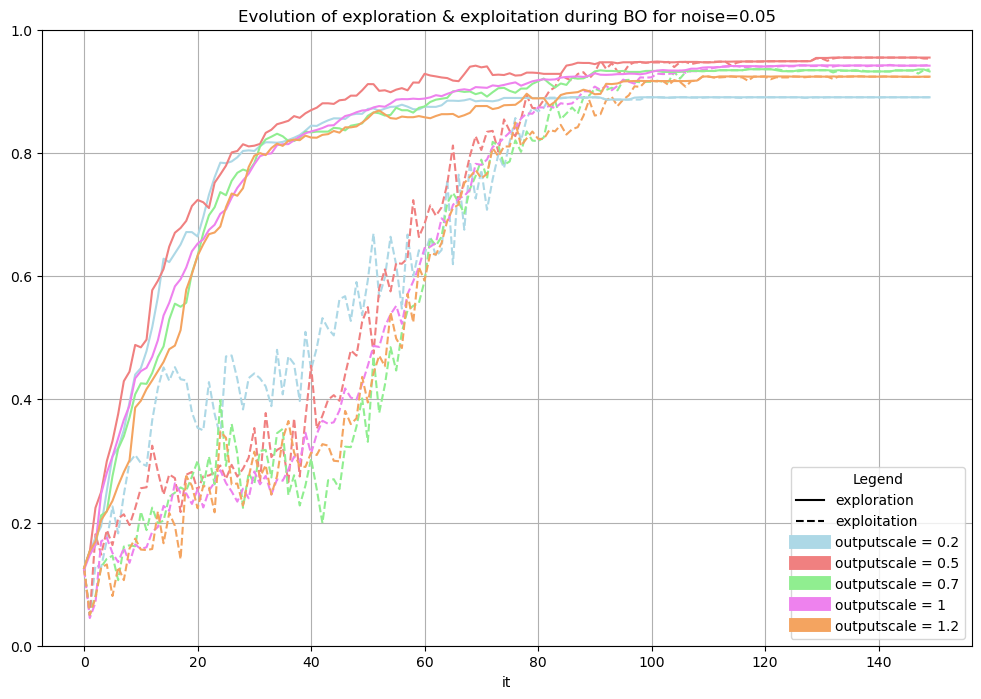

In [24]:

# Assign colors for each model
colors = {
    'sim1': 'lightblue',
    'sim2': 'lightcoral',
    'sim3': 'lightgreen',
    'sim4': 'violet',
    'sim5': 'sandybrown'
}

plt.figure(figsize=(12, 8)) 

# Plot training losses 
plt.plot(pp005_02.exploitation(), color=colors['sim1'], linestyle='--')
plt.plot(pp005_05.exploitation(), color=colors['sim2'], linestyle='--')
plt.plot(pp005_07.exploitation(), color=colors['sim3'], linestyle='--')
plt.plot(pp005_1.exploitation(), color=colors['sim4'], linestyle='--')
plt.plot(pp005_12.exploitation(), color=colors['sim5'], linestyle='--')


# Plot validation losses 
plt.plot(pp005_02.exploration(), color=colors['sim1'], linestyle='-')
plt.plot(pp005_05.exploration(), color=colors['sim2'], linestyle='-')
plt.plot(pp005_07.exploration(), color=colors['sim3'], linestyle='-')
plt.plot(pp005_1.exploration(), color=colors['sim4'], linestyle='-')
plt.plot(pp005_12.exploration(), color=colors['sim5'], linestyle='-')


# Create custom legend entries
train_line = mlines.Line2D([], [], color='black', linestyle='-', label='exploration')
validation_line = mlines.Line2D([], [], color='black', linestyle='--', label='exploitation')
# test_marker = mlines.Line2D([], [], color='black', marker='x', linestyle='', label='Test')
# batchsize_line = mlines.Line2D([], [], color='black', linestyle='-', label='batchize=1024', linewidth = '3')

model1_patch = mlines.Line2D([], [], color=colors['sim1'], label='outputscale = 0.2', linestyle='-', linewidth = '10')
model2_patch = mlines.Line2D([], [], color=colors['sim2'], label='outputscale = 0.5', linestyle='-', linewidth = '10')
model3_patch = mlines.Line2D([], [], color=colors['sim3'], label='outputscale = 0.7', linestyle='-', linewidth = '10')
model6_patch = mlines.Line2D([], [], color=colors['sim4'], label='outputscale = 1', linestyle='-', linewidth = '10')
model7_patch = mlines.Line2D([], [], color=colors['sim5'], label='outputscale = 1.2', linestyle='-', linewidth = '10')

# Add the legend
plt.legend(handles=[train_line, validation_line, model1_patch, model2_patch, model3_patch, model6_patch, model7_patch],
           title='Legend')

# Add labels and title
plt.xlabel('it')
# plt.ylabel('exploration or exploitation')
# plt.yscale('log')
plt.ylim(0,1)
plt.title("Evolution of exploration & exploitation during BO for noise=0.05")
plt.grid()

# Display the plot
plt.show()

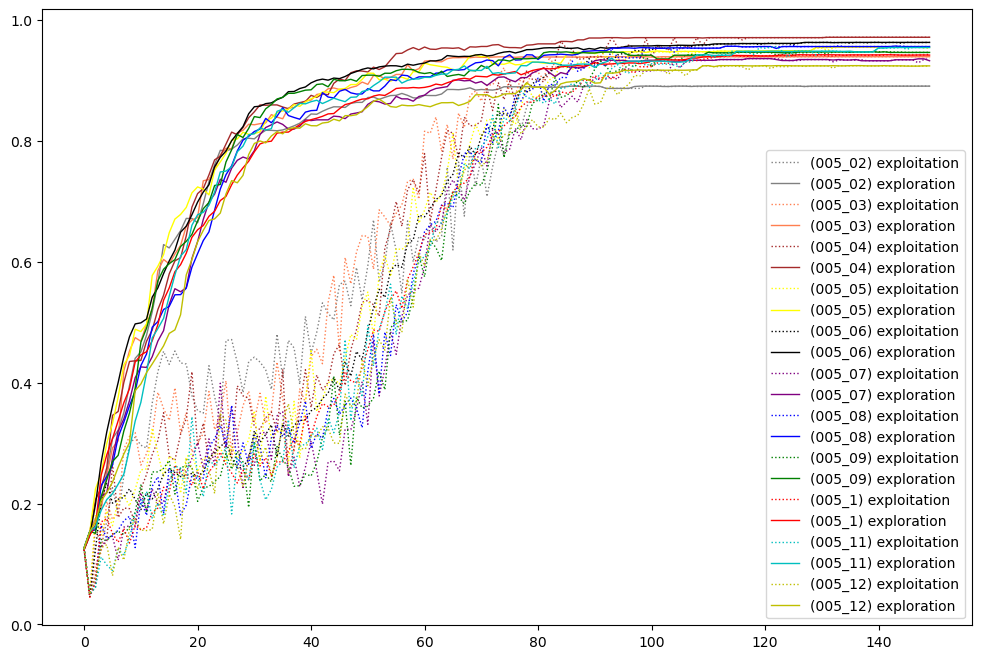

In [14]:
plt.figure(figsize=(12,8))

plt.plot(pp005_02.exploitation(), color='grey', linewidth=1, ls=':', label='(005_02) exploitation')
plt.plot(pp005_02.exploration(), color='grey', linewidth=1, label='(005_02) exploration')
plt.plot(pp005_03.exploitation(), color='coral', linewidth=1, ls=':', label='(005_03) exploitation')
plt.plot(pp005_03.exploration(), color='coral', linewidth=1, label='(005_03) exploration')
plt.plot(pp005_04.exploitation(), color='brown', linewidth=1, ls=':', label='(005_04) exploitation')
plt.plot(pp005_04.exploration(), color='brown', linewidth=1, label='(005_04) exploration')
plt.plot(pp005_05.exploitation(), color='yellow', linewidth=1, ls=':', label='(005_05) exploitation')
plt.plot(pp005_05.exploration(), color='yellow', linewidth=1, label='(005_05) exploration')
plt.plot(pp005_06.exploitation(), color='black', linewidth=1, ls=':', label='(005_06) exploitation')
plt.plot(pp005_06.exploration(), color='black', linewidth=1, label='(005_06) exploration')
plt.plot(pp005_07.exploitation(), color='purple', linewidth=1, ls=':', label='(005_07) exploitation')
plt.plot(pp005_07.exploration(), color='purple', linewidth=1, label='(005_07) exploration')
plt.plot(pp005_08.exploitation(), color='b', linewidth=1, ls=':', label='(005_08) exploitation')
plt.plot(pp005_08.exploration(), color='b', linewidth=1, label='(005_08) exploration')
plt.plot(pp005_09.exploitation(), color='g', linewidth=1, ls=':', label='(005_09) exploitation')
plt.plot(pp005_09.exploration(), color='g', linewidth=1, label='(005_09) exploration')
plt.plot(pp005_1.exploitation(), color='r', linewidth=1, ls=':', label='(005_1) exploitation')
plt.plot(pp005_1.exploration(), color='r', linewidth=1, label='(005_1) exploration')
plt.plot(pp005_11.exploitation(), color='c', linewidth=1, ls=':', label='(005_11) exploitation')
plt.plot(pp005_11.exploration(), color='c', linewidth=1, label='(005_11) exploration')
plt.plot(pp005_12.exploitation(), color='y', linewidth=1, ls=':', label='(005_12) exploitation')
plt.plot(pp005_12.exploration(), color='y', linewidth=1, label='(005_12) exploration')

plt.legend()
plt.show()

## KAPPA variation 2

In [2]:
pp4 = PostProcessor('results/gpbo_gpytorch_UCB_cebus1_test_og_KAPPA4.npz')
pp4.load_data(load_hyperparams=True)
pp6 = PostProcessor('results/gpbo_gpytorch_UCB_cebus1_test_og_KAPPA6.npz')
pp6.load_data(load_hyperparams=True)
pp8 = PostProcessor('results/gpbo_gpytorch_UCB_cebus1_test_og_KAPPA8.npz')
pp8.load_data(load_hyperparams=True)


ppe1 = PostProcessor('results/gpbo_estimated_gpytorch_UCB_cebus1_test_pseudo_gpy_KAPPA1.npz')
ppe1.load_data(load_hyperparams=True)
ppe2 = PostProcessor('results/gpbo_estimated_gpytorch_UCB_cebus1_test_pseudo_gpy_KAPPA2.npz')
ppe2.load_data(load_hyperparams=True)
ppe3 = PostProcessor('results/gpbo_estimated_gpytorch_UCB_cebus1_test_pseudo_gpy_KAPPA3.npz')
ppe3.load_data(load_hyperparams=True)
ppe4 = PostProcessor('results/gpbo_estimated_gpytorch_UCB_cebus1_test_pseudo_gpy_KAPPA4.npz')
ppe4.load_data(load_hyperparams=True)
ppe5 = PostProcessor('results/gpbo_estimated_gpytorch_UCB_cebus1_test_pseudo_gpy_KAPPA5.npz')
ppe5.load_data(load_hyperparams=True)
ppe6 = PostProcessor('results/gpbo_estimated_gpytorch_UCB_cebus1_test_pseudo_gpy_KAPPA6.npz')
ppe6.load_data(load_hyperparams=True)
ppe7 = PostProcessor('results/gpbo_estimated_gpytorch_UCB_cebus1_test_pseudo_gpy_KAPPA7.npz')
ppe7.load_data(load_hyperparams=True)
ppe8 = PostProcessor('results/gpbo_estimated_gpytorch_UCB_cebus1_test_pseudo_gpy_KAPPA8.npz')
ppe8.load_data(load_hyperparams=True)

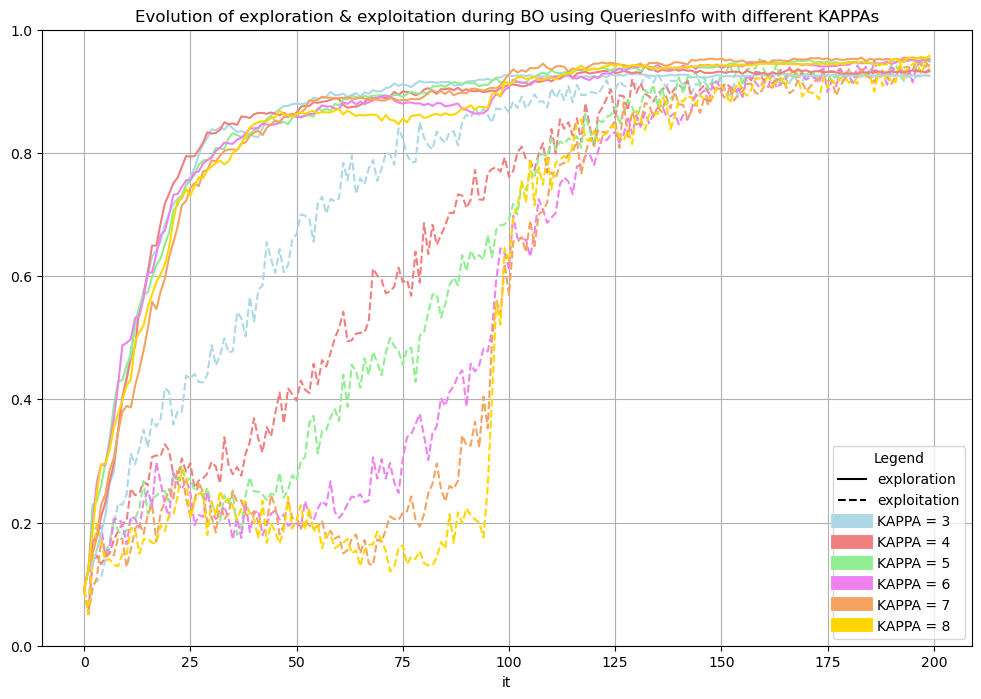

In [44]:

# Assign colors for each model
colors = {
    'sim1': 'lightblue',
    'sim2': 'lightcoral',
    'sim3': 'lightgreen',
    'sim4': 'violet',
    'sim5': 'sandybrown',
    'sim6': 'gold',
    'sim7': 'mediumaquamarine',
    'sim8': 'plum',
    'sim9': 'salmon',
    'sim10': 'lightskyblue'
}

plt.figure(figsize=(12, 8)) 

# Plot training losses 
# plt.plot(ppe1.exploitation(), color=colors['sim7'], linestyle='--')
# plt.plot(ppe2.exploitation(), color=colors['sim8'], linestyle='--')
plt.plot(ppe3.exploitation(), color=colors['sim1'], linestyle='--')
plt.plot(ppe4.exploitation(), color=colors['sim2'], linestyle='--')
plt.plot(ppe5.exploitation(), color=colors['sim3'], linestyle='--')
plt.plot(ppe6.exploitation(), color=colors['sim4'], linestyle='--')
plt.plot(ppe7.exploitation(), color=colors['sim5'], linestyle='--')
plt.plot(ppe8.exploitation(), color=colors['sim6'], linestyle='--')



# Plot validation losses 
# plt.plot(ppe1.exploration(), color=colors['sim7'], linestyle='-')
# plt.plot(ppe2.exploration(), color=colors['sim8'], linestyle='-')
plt.plot(ppe3.exploration(), color=colors['sim1'], linestyle='-')
plt.plot(ppe4.exploration(), color=colors['sim2'], linestyle='-')
plt.plot(ppe5.exploration(), color=colors['sim3'], linestyle='-')
plt.plot(ppe6.exploration(), color=colors['sim4'], linestyle='-')
plt.plot(ppe7.exploration(), color=colors['sim5'], linestyle='-')
plt.plot(ppe8.exploration(), color=colors['sim6'], linestyle='-')


# Create custom legend entries
train_line = mlines.Line2D([], [], color='black', linestyle='-', label='exploration')
validation_line = mlines.Line2D([], [], color='black', linestyle='--', label='exploitation')


model1_patch = mlines.Line2D([], [], color=colors['sim1'], label='KAPPA = 3', linestyle='-', linewidth = '10')
model2_patch = mlines.Line2D([], [], color=colors['sim2'], label='KAPPA = 4', linestyle='-', linewidth = '10')
model3_patch = mlines.Line2D([], [], color=colors['sim3'], label='KAPPA = 5', linestyle='-', linewidth = '10')
model4_patch = mlines.Line2D([], [], color=colors['sim4'], label='KAPPA = 6', linestyle='-', linewidth = '10')
model5_patch = mlines.Line2D([], [], color=colors['sim5'], label='KAPPA = 7', linestyle='-', linewidth = '10')
model6_patch = mlines.Line2D([], [], color=colors['sim6'], label='KAPPA = 8', linestyle='-', linewidth = '10')
model7_patch = mlines.Line2D([], [], color=colors['sim7'], label='KAPPA = 1', linestyle='-', linewidth = '10')
model8_patch = mlines.Line2D([], [], color=colors['sim8'], label='KAPPA = 2', linestyle='-', linewidth = '10')

# Add the legend
plt.legend(handles=[train_line, validation_line, model1_patch, model2_patch, model3_patch, model4_patch, model5_patch, model6_patch],
           title='Legend')

# Add labels and title
plt.xlabel('it')
# plt.ylabel('exploration or exploitation')
# plt.yscale('log')
plt.ylim(0,1)
plt.title("Evolution of exploration & exploitation during BO using QueriesInfo with different KAPPAs")
plt.grid()

# Display the plot
plt.show()

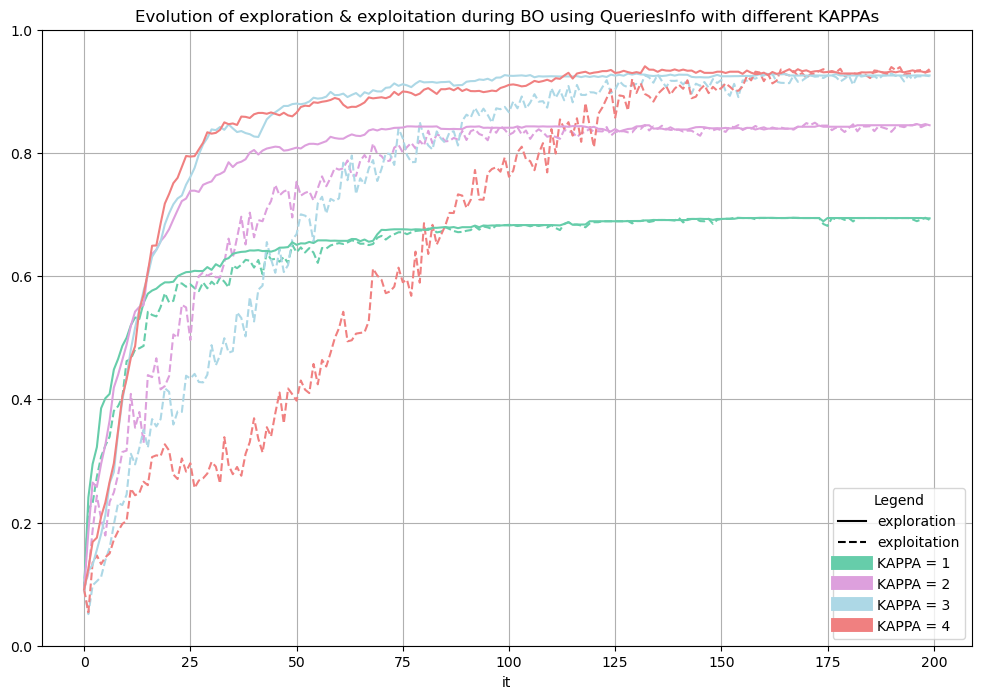

In [45]:
# Assign colors for each model
colors = {
    'sim1': 'lightblue',
    'sim2': 'lightcoral',
    'sim3': 'lightgreen',
    'sim4': 'violet',
    'sim5': 'sandybrown',
    'sim6': 'gold',
    'sim7': 'mediumaquamarine',
    'sim8': 'plum',
    'sim9': 'salmon',
    'sim10': 'lightskyblue'
}

plt.figure(figsize=(12, 8)) 

# Plot training losses 
plt.plot(ppe1.exploitation(), color=colors['sim7'], linestyle='--')
plt.plot(ppe2.exploitation(), color=colors['sim8'], linestyle='--')
plt.plot(ppe3.exploitation(), color=colors['sim1'], linestyle='--')
plt.plot(ppe4.exploitation(), color=colors['sim2'], linestyle='--')
# plt.plot(ppe5.exploitation(), color=colors['sim3'], linestyle='--')
# plt.plot(ppe6.exploitation(), color=colors['sim4'], linestyle='--')
# plt.plot(ppe7.exploitation(), color=colors['sim5'], linestyle='--')
# plt.plot(ppe8.exploitation(), color=colors['sim6'], linestyle='--')



# Plot validation losses 
plt.plot(ppe1.exploration(), color=colors['sim7'], linestyle='-')
plt.plot(ppe2.exploration(), color=colors['sim8'], linestyle='-')
plt.plot(ppe3.exploration(), color=colors['sim1'], linestyle='-')
plt.plot(ppe4.exploration(), color=colors['sim2'], linestyle='-')
# plt.plot(ppe5.exploration(), color=colors['sim3'], linestyle='-')
# plt.plot(ppe6.exploration(), color=colors['sim4'], linestyle='-')
# plt.plot(ppe7.exploration(), color=colors['sim5'], linestyle='-')
# plt.plot(ppe8.exploration(), color=colors['sim6'], linestyle='-')


# Create custom legend entries
train_line = mlines.Line2D([], [], color='black', linestyle='-', label='exploration')
validation_line = mlines.Line2D([], [], color='black', linestyle='--', label='exploitation')


model1_patch = mlines.Line2D([], [], color=colors['sim1'], label='KAPPA = 3', linestyle='-', linewidth = '10')
model2_patch = mlines.Line2D([], [], color=colors['sim2'], label='KAPPA = 4', linestyle='-', linewidth = '10')
# model3_patch = mlines.Line2D([], [], color=colors['sim3'], label='KAPPA = 5', linestyle='-', linewidth = '10')
# model4_patch = mlines.Line2D([], [], color=colors['sim4'], label='KAPPA = 6', linestyle='-', linewidth = '10')
# model5_patch = mlines.Line2D([], [], color=colors['sim5'], label='KAPPA = 7', linestyle='-', linewidth = '10')
# model6_patch = mlines.Line2D([], [], color=colors['sim6'], label='KAPPA = 8', linestyle='-', linewidth = '10')
model7_patch = mlines.Line2D([], [], color=colors['sim7'], label='KAPPA = 1', linestyle='-', linewidth = '10')
model8_patch = mlines.Line2D([], [], color=colors['sim8'], label='KAPPA = 2', linestyle='-', linewidth = '10')

# Add the legend
plt.legend(handles=[train_line, validation_line, model7_patch, model8_patch, model1_patch, model2_patch],
           title='Legend')

# Add labels and title
plt.xlabel('it')
# plt.ylabel('exploration or exploitation')
# plt.yscale('log')
plt.ylim(0,1)
plt.title("Evolution of exploration & exploitation during BO using QueriesInfo with different KAPPAs")
plt.grid()

# Display the plot
plt.show()

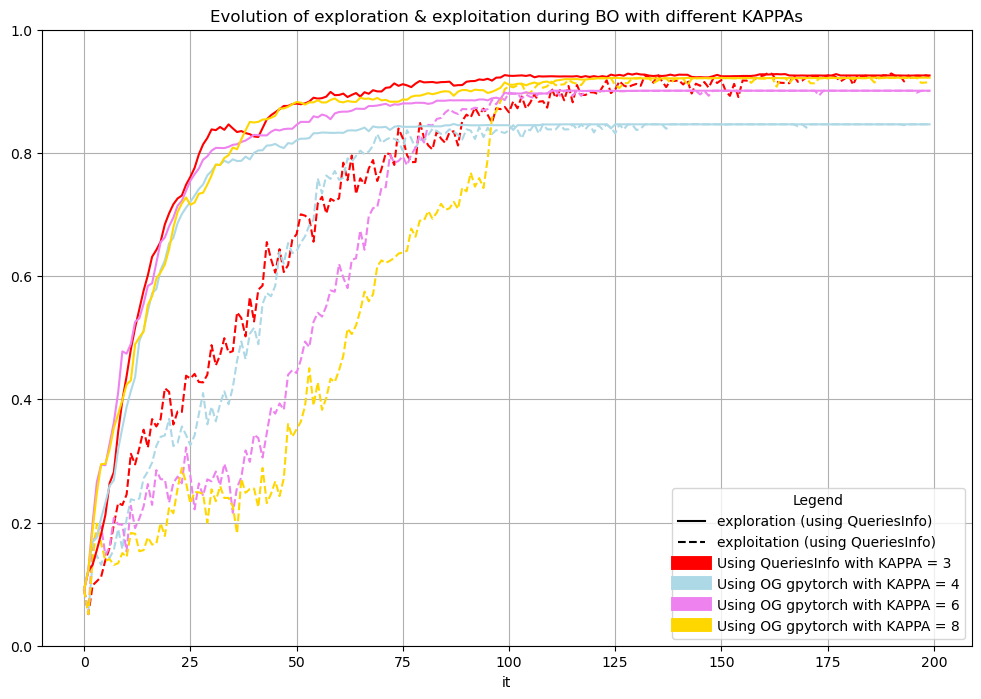

In [3]:

# Assign colors for each model
colors = {
    'sim1': 'lightblue',
    'sim2': 'lightcoral',
    'sim3': 'lightgreen',
    'sim4': 'violet',
    'sim5': 'sandybrown',
    'sim6': 'gold',
    'sim7': 'mediumaquamarine',
    'sim8': 'salmon',
    'sim9': 'plum',
    'sim10': 'lightskyblue'
}

plt.figure(figsize=(12, 8)) 

# Plot training losses 
plt.plot(ppe3.exploitation(), color='r', linestyle='--')
# plt.plot(ppe4.exploitation(), color=colors['sim2'], linestyle='--')
# plt.plot(ppe5.exploitation(), color=colors['sim3'], linestyle='--')
# plt.plot(ppe6.exploitation(), color=colors['sim4'], linestyle='--')
# plt.plot(ppe7.exploitation(), color=colors['sim5'], linestyle='--')
# plt.plot(ppe8.exploitation(), color=colors['sim6'], linestyle='--')

plt.plot(pp4.exploitation(), color=colors['sim1'], linestyle='--')
plt.plot(pp6.exploitation(), color=colors['sim4'], linestyle='--')
plt.plot(pp8.exploitation(), color=colors['sim6'], linestyle='--')


# Plot validation losses 
plt.plot(ppe3.exploration(), color='r', linestyle='-')
# plt.plot(ppe4.exploration(), color=colors['sim2'], linestyle='-')
# plt.plot(ppe5.exploration(), color=colors['sim3'], linestyle='-')
# plt.plot(ppe6.exploration(), color=colors['sim4'], linestyle='-')
# plt.plot(ppe7.exploration(), color=colors['sim5'], linestyle='-')
# plt.plot(ppe8.exploration(), color=colors['sim6'], linestyle='-')

plt.plot(pp4.exploration(), color=colors['sim1'], linestyle='-')
plt.plot(pp6.exploration(), color=colors['sim4'], linestyle='-')
plt.plot(pp8.exploration(), color=colors['sim6'], linestyle='-')

# Create custom legend entries
train_line = mlines.Line2D([], [], color='black', linestyle='-', label='exploration (using QueriesInfo)')
validation_line = mlines.Line2D([], [], color='black', linestyle='--', label='exploitation (using QueriesInfo)')

model1_patch = mlines.Line2D([], [], color='r', label='Using QueriesInfo with KAPPA = 3', linestyle='-', linewidth = '10')
model2_patch = mlines.Line2D([], [], color=colors['sim1'], label='Using OG gpytorch with KAPPA = 4', linestyle='-', linewidth = '10')
# model3_patch = mlines.Line2D([], [], color=colors['sim3'], label='KAPPA = 5', linestyle='-', linewidth = '10')
model4_patch = mlines.Line2D([], [], color=colors['sim4'], label='Using OG gpytorch with KAPPA = 6', linestyle='-', linewidth = '10')
# model5_patch = mlines.Line2D([], [], color=colors['sim5'], label='KAPPA = 7', linestyle='-', linewidth = '10')
model6_patch = mlines.Line2D([], [], color=colors['sim6'], label='Using OG gpytorch with KAPPA = 8', linestyle='-', linewidth = '10')

# Add the legend
plt.legend(handles=[train_line, validation_line, model1_patch, model2_patch, model4_patch, model6_patch],
           title='Legend')

# Add labels and title
plt.xlabel('it')
# plt.ylabel('exploration or exploitation')
# plt.yscale('log')
plt.ylim(0,1)
plt.title("Evolution of exploration & exploitation during BO with different KAPPAs")
plt.grid()

# Display the plot
plt.show()

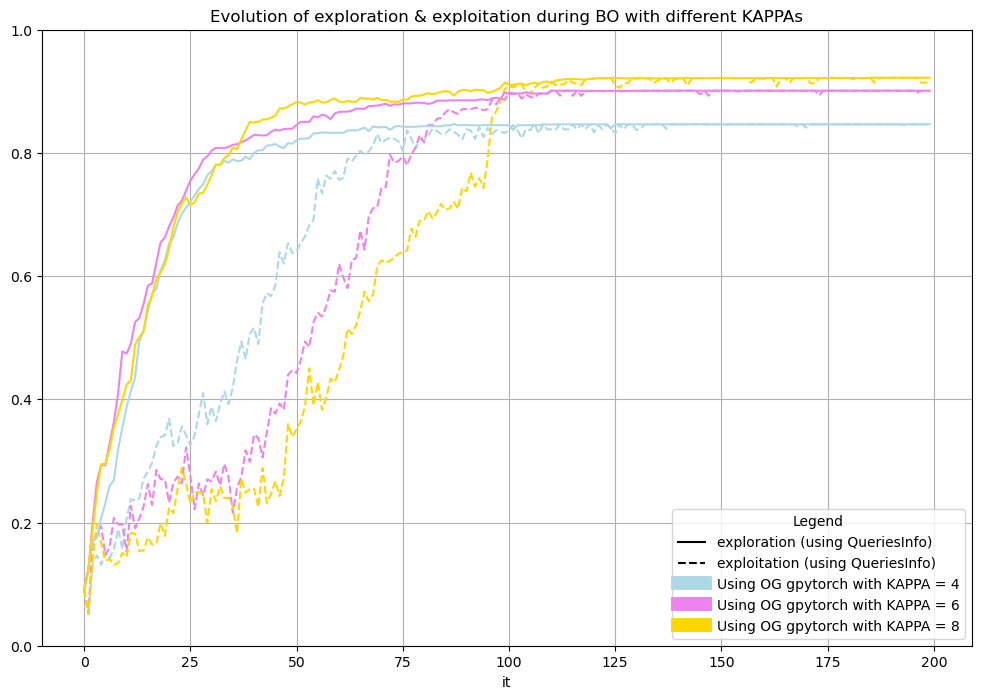

In [7]:

# Assign colors for each model
colors = {
    'sim1': 'lightblue',
    'sim2': 'lightcoral',
    'sim3': 'lightgreen',
    'sim4': 'violet',
    'sim5': 'sandybrown',
    'sim6': 'gold',
    'sim7': 'mediumaquamarine',
    'sim8': 'salmon',
    'sim9': 'plum',
    'sim10': 'lightskyblue'
}

plt.figure(figsize=(12, 8)) 

# Plot training losses 
# plt.plot(ppe3.exploitation(), color='r', linestyle='--')
# plt.plot(ppe4.exploitation(), color=colors['sim2'], linestyle='--')
# plt.plot(ppe5.exploitation(), color=colors['sim3'], linestyle='--')
# plt.plot(ppe6.exploitation(), color=colors['sim4'], linestyle='--')
# plt.plot(ppe7.exploitation(), color=colors['sim5'], linestyle='--')
# plt.plot(ppe8.exploitation(), color=colors['sim6'], linestyle='--')

plt.plot(pp4.exploitation(), color=colors['sim1'], linestyle='--')
plt.plot(pp6.exploitation(), color=colors['sim4'], linestyle='--')
plt.plot(pp8.exploitation(), color=colors['sim6'], linestyle='--')


# Plot validation losses 
# plt.plot(ppe3.exploration(), color='r', linestyle='-')
# plt.plot(ppe4.exploration(), color=colors['sim2'], linestyle='-')
# plt.plot(ppe5.exploration(), color=colors['sim3'], linestyle='-')
# plt.plot(ppe6.exploration(), color=colors['sim4'], linestyle='-')
# plt.plot(ppe7.exploration(), color=colors['sim5'], linestyle='-')
# plt.plot(ppe8.exploration(), color=colors['sim6'], linestyle='-')

plt.plot(pp4.exploration(), color=colors['sim1'], linestyle='-')
plt.plot(pp6.exploration(), color=colors['sim4'], linestyle='-')
plt.plot(pp8.exploration(), color=colors['sim6'], linestyle='-')

# Create custom legend entries
train_line = mlines.Line2D([], [], color='black', linestyle='-', label='exploration (using QueriesInfo)')
validation_line = mlines.Line2D([], [], color='black', linestyle='--', label='exploitation (using QueriesInfo)')

# model1_patch = mlines.Line2D([], [], color='r', label='Using QueriesInfo with KAPPA = 3', linestyle='-', linewidth = '10')
model2_patch = mlines.Line2D([], [], color=colors['sim1'], label='Using OG gpytorch with KAPPA = 4', linestyle='-', linewidth = '10')
# model3_patch = mlines.Line2D([], [], color=colors['sim3'], label='KAPPA = 5', linestyle='-', linewidth = '10')
model4_patch = mlines.Line2D([], [], color=colors['sim4'], label='Using OG gpytorch with KAPPA = 6', linestyle='-', linewidth = '10')
# model5_patch = mlines.Line2D([], [], color=colors['sim5'], label='KAPPA = 7', linestyle='-', linewidth = '10')
model6_patch = mlines.Line2D([], [], color=colors['sim6'], label='Using OG gpytorch with KAPPA = 8', linestyle='-', linewidth = '10')

# Add the legend
plt.legend(handles=[train_line, validation_line, model2_patch, model4_patch, model6_patch],
           title='Legend')

# Add labels and title
plt.xlabel('it')
# plt.ylabel('exploration or exploitation')
# plt.yscale('log')
plt.ylim(0,1)
plt.title("Evolution of exploration & exploitation during BO with different KAPPAs")
plt.grid()

# Display the plot
plt.show()